**Install library**

In [ ]:
!pip install pycaret
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.8 MB/s eta 0

**Import Library**

In [ ]:
from pycaret.classification import *

**Mount Drive**

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
import pandas as pd
smoking_drinking = pd.read_csv("/content/gdrive/MyDrive/Datasets/smoking_driking_dataset_Ver01.csv")

In [21]:
smoking_drinking_dataset = smoking_drinking.head(500)

In [25]:
smoking_drinking_dataset.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [32]:
smoking_drinking_dataset.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

**Setup**

In [22]:
binary_class = setup(data=smoking_drinking_dataset,target="DRK_YN")

,Description,Value
0,Session id,5566
1,Target,DRK_YN
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(500, 24)"
5,Transformed data shape,"(500, 24)"
6,Transformed train set shape,"(350, 24)"
7,Transformed test set shape,"(150, 24)"
8,Ordinal features,1
9,Numeric features,22


**Compare Model**

In [23]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7400,0.7905,0.7690,0.7227,0.7442,0.4793,0.4819,0.2580
xgboost,Extreme Gradient Boosting,0.7029,0.7588,0.7000,0.7024,0.6991,0.4043,0.4066,0.1010
lightgbm,Light Gradient Boosting Machine,0.7029,0.7497,0.7003,0.7050,0.7002,0.4049,0.4076,0.3890
et,Extra Trees Classifier,0.7000,0.7747,0.7127,0.6946,0.7010,0.3999,0.4030,0.1660
qda,Quadratic Discriminant Analysis,0.6800,0.6943,0.7418,0.6578,0.6950,0.3604,0.3672,0.0500
gbc,Gradient Boosting Classifier,0.6800,0.7520,0.7059,0.6699,0.6847,0.3595,0.3634,0.1390
ada,Ada Boost Classifier,0.6743,0.7252,0.6667,0.6754,0.6693,0.3481,0.3497,0.1190
lr,Logistic Regression,0.6714,0.7503,0.6889,0.6661,0.6748,0.3411,0.3445,0.6050
lda,Linear Discriminant Analysis,0.6629,0.7549,0.6886,0.6555,0.6695,0.3244,0.3275,0.0500
svm,SVM - Linear Kernel,0.6600,0.0000,0.7627,0.6697,0.6754,0.3176,0.3804,0.0830


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Plots**

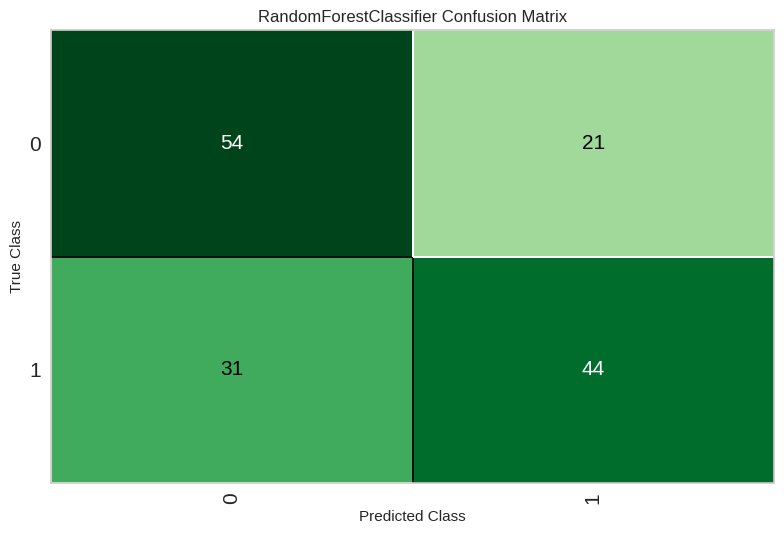

In [26]:
plot_model(best_model, plot = 'confusion_matrix')

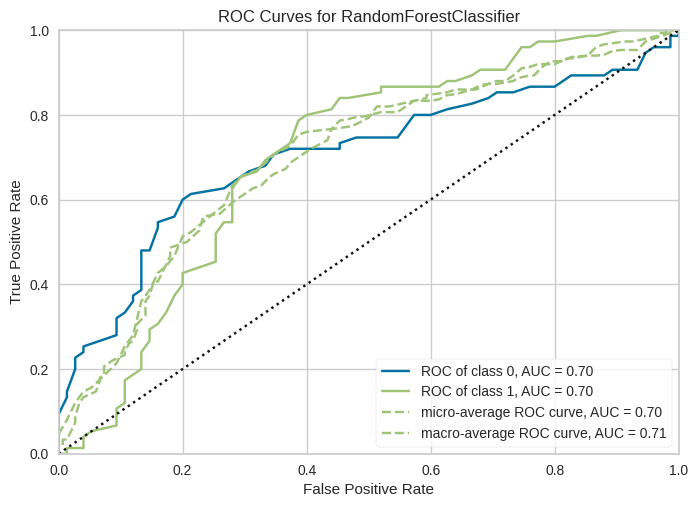

In [27]:
plot_model(best_model, plot = 'auc')

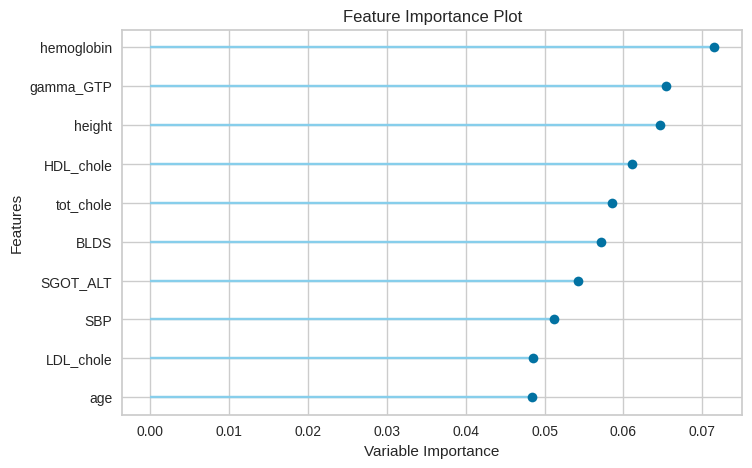

In [28]:
plot_model(best_model, plot = 'feature')

**Evaluate Model**

In [29]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Predict Model**

In [30]:
predictions = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6533,0.7045,0.6533,0.6561,0.6518,0.3067,0.3094


In [31]:
final_model = finalize_model(best_model)
final_model

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'height', 'weight',
                                             'waistline', 'sight_left',
                                             'sight_right', 'hear_left',
                                             'hear_right', 'SBP', 'DBP', 'BLDS',
                                             'tot_chole', 'HDL_chole',
                                             'LDL_chol...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=5566,
                                        verbose=0, warm_start=False))],
         verbose=False)

**Gradio**

In [24]:
create_app(best_model)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>